In [48]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_geopy_app", timeout=10)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle
from src.processing import process_legs, process_stops, generate_master_data, train_test_split
from src.plotting import plot_routes, plot_nulls, plot_correlation
from src.modelling import regressor_pipeline

In [2]:
# Reading raw data
df_routes = pd.read_csv("../data/input/training_routes.csv")
df_legs = pd.read_csv("../data/input/training_legs.csv")
df_stops = pd.read_csv("../data/input/training_stops.csv")

##### EDA

In [3]:
# Plotting routes centriods
plot_routes(df_routes)

##### Preprocssing and data analysis

In [3]:
# Processing legs data and generating master data
df_legs_pro = process_legs(df=df_legs)
df_stops_pro = process_stops(df=df_stops)
df_master = generate_master_data(df_routes=df_routes, df_stops=df_stops_pro, df_legs=df_legs_pro)

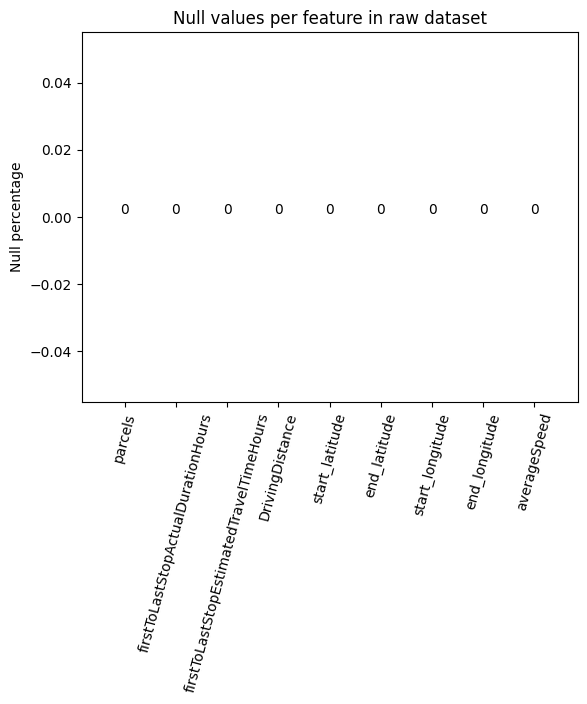

In [4]:
# Plotting null values
plot_nulls(df_master)

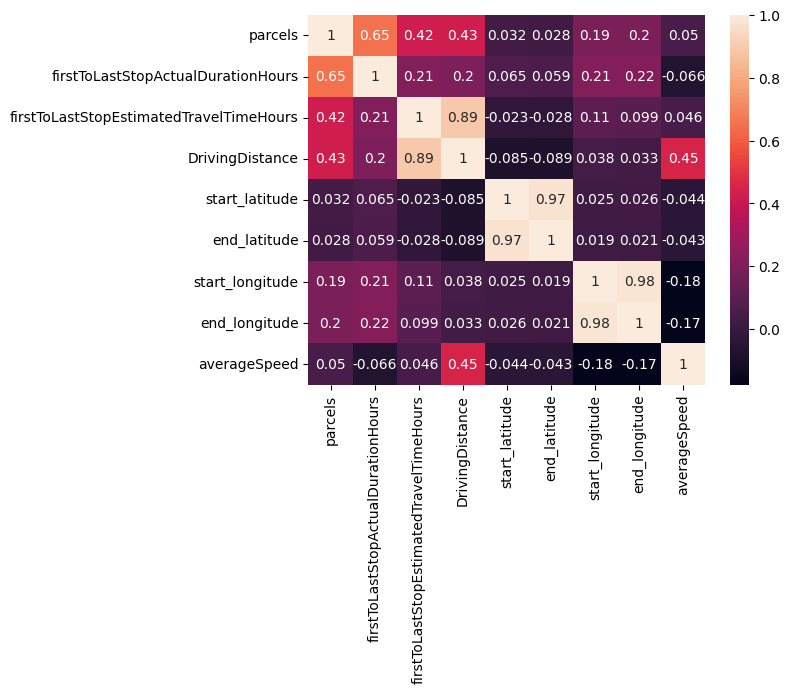

In [5]:
# Plotting correlation matrix
plot_correlation(df_master)

##### Modelling

In [ ]:
# Selecting the mode and using regressor pipeline
XGBoostRegressor = GradientBoostingRegressor()
y_test, predictions, model = regressor_pipeline(df=df_master, target_col="firstToLastStopActualDurationHours", model=XGBoostRegressor, test_size=0.2)
print(f"R squared of predictions is {r2_score(y_test, predictions)}")
print(f"Mean absolute error is {mean_absolute_error(y_test, predictions)}")


R squared of predictions is 0.5424948717694744
Mean absolute error is 1.1426344034042188


In [55]:
# Saving the model and writing prediction to file
np.save("../data/output/predictions.npy", predictions)
filename = '../models/xgboost_model.sav'
pickle.dump(model, open(filename, 'wb'))